<a href="https://colab.research.google.com/github/covid19-tomography-analysis/feature-extraction/blob/main/feature_extraction_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from keras import backend as k
from keras.utils.np_utils import to_categorical
from keras.layers import Input, InputLayer, Dense, Conv2D, Activation, Flatten, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import gradient_descent_v2
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Covid19 Tomography Analysis/feature-extraction/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Covid19 Tomography Analysis/feature-extraction/test.csv')

In [4]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [5]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train = train.drop(labels="label", axis=1)
x_test = test.drop(labels="label", axis=1)

y_train = train['label']
y_test = test['label']

In [8]:
x_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


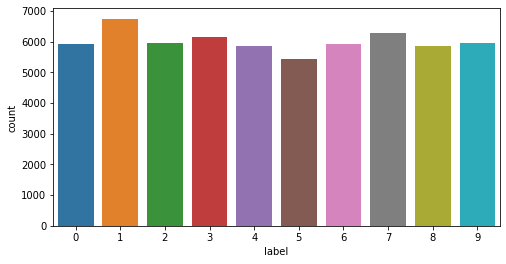

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=train)

In [13]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

In [10]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [15]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [19]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

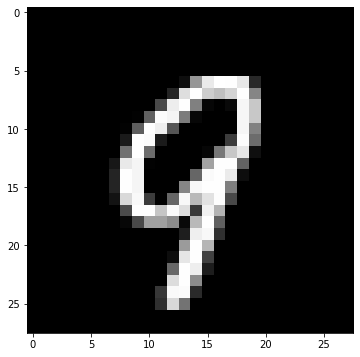

In [23]:
plt.figure(figsize=(6,6))
plt.imshow(x_train[1][:, :, 0], cmap='gray')

In [29]:
RNC = Sequential()

RNC.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
RNC.add(MaxPooling2D(2, 2))

RNC.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'))
RNC.add(MaxPooling2D(2, 2))

RNC.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu'))
RNC.add(MaxPooling2D(2, 2))

RNC.add(Flatten())

RNC.add(Dense(256, activation='relu'))

RNC.add(Dense(256, activation='relu'))

RNC.add(Dense(10, activation='softmax'))

RNC.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [30]:
momentum = 0.5
sgd = gradient_descent_v2.SGD(learning_rate=0.01, momentum=momentum, decay=0.0, nesterov=False)
RNC.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [31]:
history = RNC.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10, verbose=1)

Epoch 1/10
1313/1313 [==============================] - 67s 50ms/step - loss: 0.7806 - accuracy: 0.7558 - val_loss: 0.2663 - val_accuracy: 0.9151
Epoch 2/10
1313/1313 [==============================] - 69s 52ms/step - loss: 0.1808 - accuracy: 0.9424 - val_loss: 0.1704 - val_accuracy: 0.9458
Epoch 3/10
1313/1313 [==============================] - 62s 47ms/step - loss: 0.1244 - accuracy: 0.9608 - val_loss: 0.1376 - val_accuracy: 0.9562
Epoch 4/10
1313/1313 [==============================] - 41s 32ms/step - loss: 0.0975 - accuracy: 0.9696 - val_loss: 0.0891 - val_accuracy: 0.9731
Epoch 5/10
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0809 - accuracy: 0.9744 - val_loss: 0.0810 - val_accuracy: 0.9740
Epoch 6/10
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0697 - accuracy: 0.9778 - val_loss: 0.0799 - val_accuracy: 0.9740
Epoch 7/10
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0599 - accuracy: 0.9811 - val_loss: 0.0810 -

In [32]:
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss) + 1)

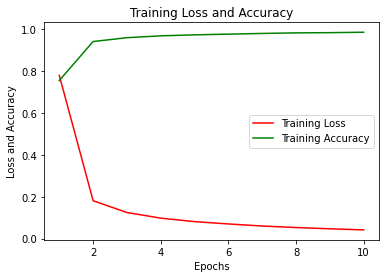

In [33]:
plt.plot(epochs, loss, color='red', label='Training Loss')
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.legend()
plt.show()

In [34]:
loss = history.history['val_loss']
acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

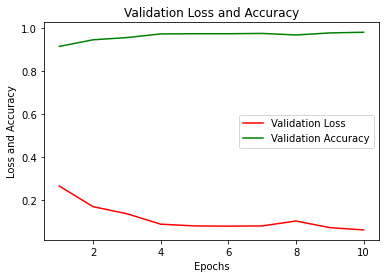

In [35]:
plt.plot(epochs, loss, color='red', label='Validation Loss')
plt.plot(epochs, acc, color='green', label='Validation Accuracy')
plt.title('Validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.legend()
plt.show()

In [44]:
layer_outputs = [layer.output for layer in RNC.layers]
layer_outputs = layer_outputs[1:]
activation_model = Model(inputs=RNC.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[60].reshape(1, 28, 28, 1))

In [48]:
def display_activation(activations, col_size, row_size, act_index):
  activation = activations[act_index]
  activation_index = 0
  fig, ax = plt.subplots(row_size, col_size, figsize=(row_size * 3, col_size * 2))
  for row in range(0, row_size):
    for col in range(0, col_size):
      ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
      activation_index += 1

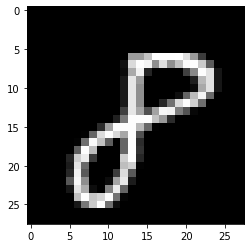

In [46]:
plt.imshow(x_train[60][:, :, 0], cmap='gray')

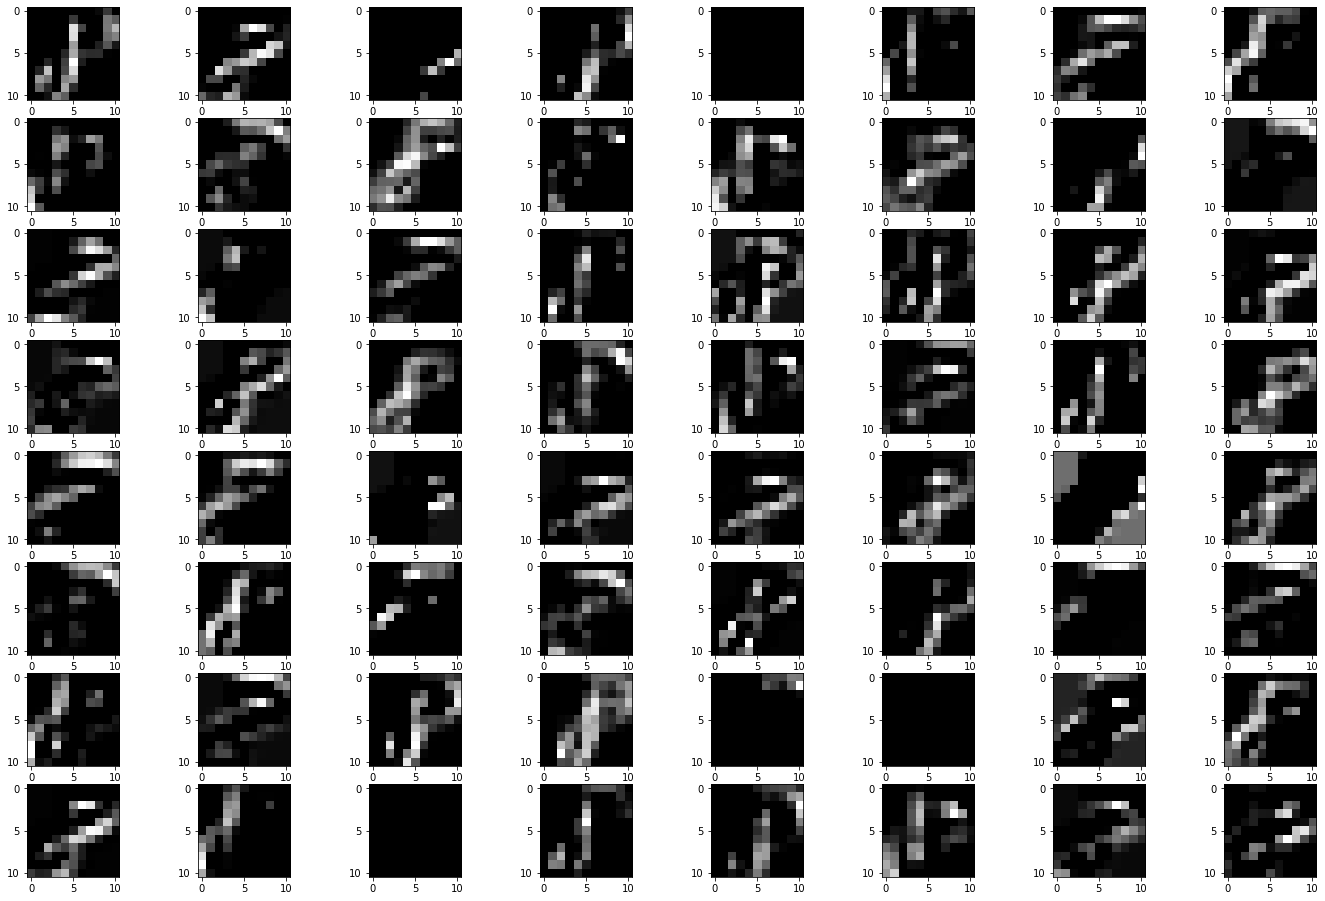

In [49]:
display_activation(activations, 8, 8, 1)

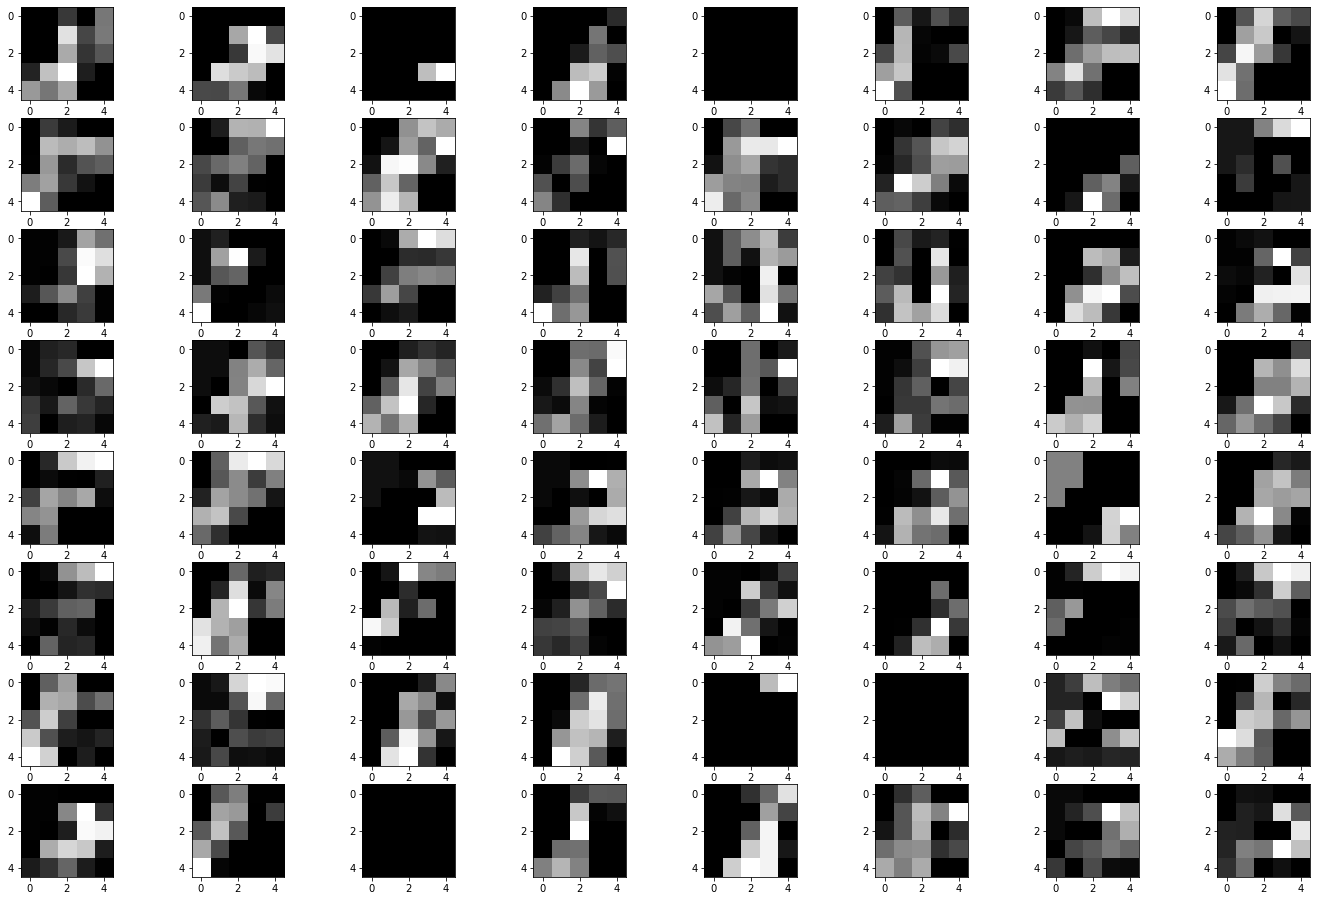

In [50]:
display_activation(activations, 8, 8, 2)

In [52]:
y_prediction = RNC.predict(x_test)
y_pred_classes = np.argmax(y_prediction, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
acc = accuracy_score(y_true, y_pred_classes)
print(f"ACCURACY: {str(acc)}")

ACCURACY: 0.981


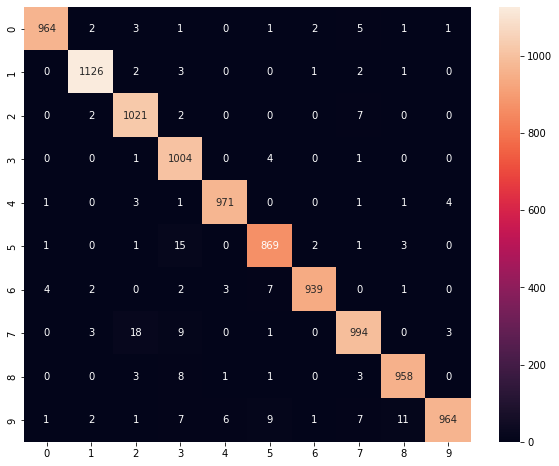

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')